In [1]:
#--------------------------ASSIGNMENT-19----------------------!

In [2]:
#------------------------Naive Bayes and Text Mining-----------

In [19]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import string

In [4]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Naive Bayes and Text Mining\\blogs.csv")

In [6]:
# Info from the dataset
print("Dataset Overview:")
print(df.head())
print("\n")
print(f"Dataset Info:\n{df.info()}")

Dataset Overview:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Dataset Info:
None


In [7]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Data      0
Labels    0
dtype: int64


In [8]:
#Handle missing values
df.dropna(inplace=True)

In [9]:
# Data cleaning and preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [10]:
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [11]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

In [12]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Implementing Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Making predictions
y_pred = nb_model.predict(X_test)

In [15]:
# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88      0.88      


Confusion Matrix:


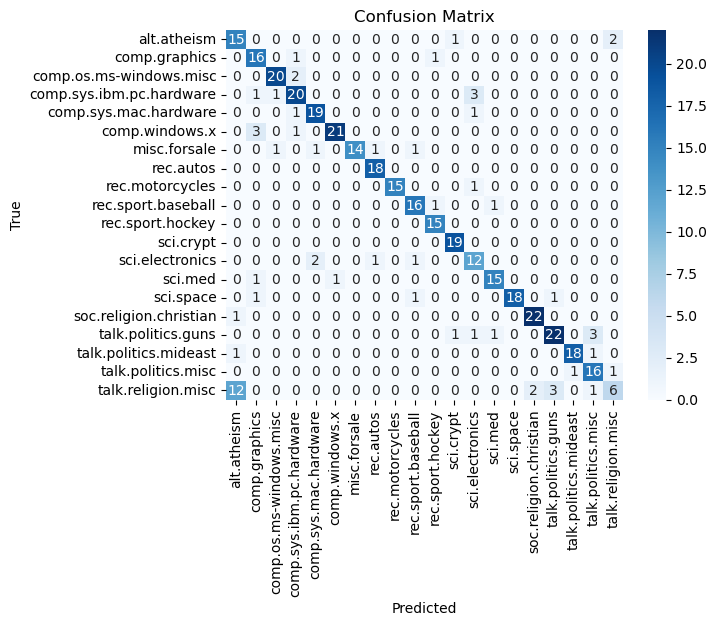

In [16]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Display Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.84


In [20]:
#Display Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

Precision: 0.85


In [21]:
# Display Recall Score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.84


In [22]:
# Display F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.84


In [23]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"


In [24]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [25]:
# Analyzing sentiment distribution across categories
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print("\nSentiment Distribution by Category:")
print(sentiment_distribution)


Sentiment Distribution by Category:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      NaN      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      NaN      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      NaN  

In [26]:
# Summary of findings
print("\nSummary of Sentiment Analysis:")
print(f"Overall Sentiment Counts:\n{df['Sentiment'].value_counts()}")


Summary of Sentiment Analysis:
Overall Sentiment Counts:
Positive    1334
Negative     631
Neutral       35
Name: Sentiment, dtype: int64


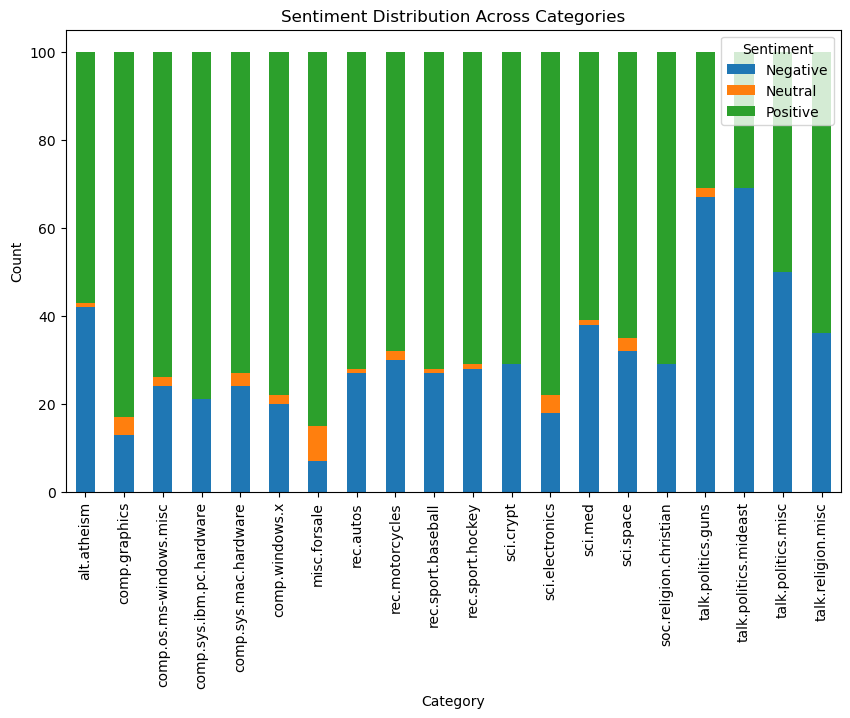

In [27]:
df.groupby('Labels')['Sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [28]:
df.to_csv('processed_blogs_categories.csv', index=False)

In [29]:
# Analysis complete. Processed data saved to 'processed_blogs_categories.csv'.

In [30]:
#-----------------------------------------FINSIH----------------------------------!